# Simple Data Science Project for client X

In [7]:
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 60)

# Vizu
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize

# Vizu settings
%matplotlib inline
plt.rcParams['font.size'] = 22
sns.set(font_scale = 1)

# Data prep and preproccessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# ML
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Hyperparams
from sklearn.model_selection import RandomizedSearchCV

## Intro

This is a simple mini data-science project I did last year for a anonymous client. It was only needed to display simple data analysis in the time span of a few hours. Below, I've rewritten a lot of the code / text / comments to generalize and tried by best to hide sensitive information by substituing variable names with replacements like 'xxx', 'yyy' etc ... I've also added comments to allow the reader to understand what is going on. 

NB: I might upload the uncensored notebook in the future whenever the information has become unrelevant. 

## 1. The dataset
X reports are submitted X from X that are X. The report is usually prepared by the X or X. The report is used to assess the X performance and includes data about the xxx, xxx, xxx, xxx, xxx and xxx more.

The attached `xxx_reports.json` contains a stripped down version of N such xxx reports. Below is a brief description of the included columns: 
- `xxx`: "description"
- `xxx`: "description"
- `xxx`: "description"
- `xxx`: "description"
- `xxx`: "description"
- `xxx`: "description"
- `xxx`: "description"
- `xxx`: "description"
- `xxx`: "description" 
- `xxx`: "description" 
- `xxx`: "description"
- `xxx`: "description" 
- `xxx`: "description"

## 2. The assignment


The project can very coarsely be divided into two phases:

1. **Data exploration**: 
- Take a look at the attached noon report data and do a brief exploration of the data (visualisations are often useful for this purpose)- Humans create the reports, so watch out for bad or curious looking data like missing entries, outliers, and wrong data types.

2. **Modelling**:
- When we're finished cleaning / preparing the data, it's time to use it for modelling. 
- We want to predict the average X (`xxx`).
- Some columns are relevant for this prediction, while others won't.
- Essentially, we decide the inputs so effectivly, we decide:
  - what kind of model to use
  - how to split the data into train/dev/test sets
  - which metric(s) to use to measure the model performance.
- We also try to quantify which features (in the data or created by use) are important.

### 3. Workflow:
- **Do**:
    - Write readable and maintainable code. (tidy notebooks are favo).
    - Maintain good structure and modularity.
- **Don't**:
    - Spend too much time fine-tuning your model to squeeze out some extra performance.

**Quick notes**:
It is more important to use an adequate model for the problem at hand than to use the most sophisticated model possible. The exploratory part is just as important as the modelling part. This isn't the typical Kaggle competition. We rather focus on showing the DS process rather than tuning the performance of the model itself.

### 4. Solution


We start by immediately exploring the data, checkout the initial data points to get a feel for what we're working with.

In [ ]:
reports = pd.read_json("xxx_reports.json")
reports.head()

"output was removed"

In [ ]:
reports.info()

"output was removed"

Line below detects frequency of missing values (NaN in numeric arrays, None or NaN in object arrays, NaT in datetimelike).

In [ ]:
print(reports.isna().sum())

### Initial notes
- We're predicting a single numeric value ( REGRESSION PROBLEM )
- A few wrong data types, possible missing values (NaN or inf)
- "variable_name" = most important column (is already missing 8000+ values)

In [ ]:
xxx_distribution = reports['xxx'].value_counts(normalize=True)
print(f"Unique xxx: {len(reports['xxx'].unique())} / {len(reports)}")

"output was removed"

In [ ]:
xxx_distribution = reports['xxx'].value_counts()
print("Unique xxx: ", len(reports['xxx'].unique()), "/ ", len(reports))

"output was removed"

In [ ]:
# Top 10
xxx_distribution.sort_values().tail(10)

"output was removed"

In [ ]:
# Checking out e.g. the 2nd frequent xxx, is the data identical for all instances?
XXX_ID = 5866
reports.loc[reports['xxx'] == XXX_ID].head()

"output was removed"

#### Observations
- Can we merge measurements xxx1, xxx2, xxx3 and create a single-representative score? 
- Remove negative values from ID

#### TODOs:
- Maybe represent xxx1 / xxx2 as integers ( 0 / 1) ?
- xxx1 and xxx2 should be int and float
- remove NaN values
- (don't know if xxx is relevant though)

In [14]:
reports['load'].value_counts()

2.0    69729
0.0    11426
1.0      106
Name: load, dtype: int64

(deviation from orignal information?)

Should be only L and B, what is PL? Research found no answers to this.
Therefore, we need to make an estimated guess of saying PL = xxx (xxx)

I'll guess and formulate it as:
- L (xxx)        = 2
- PL (?)   = 1
- B (xxx1/xxx2) = 0

In [11]:
reports["load"] = reports["load"].map(dict(L=2, PL=1, B=0)) # change the representations

I don't have time to go over everything (only got a few hours), so taking what I think is most important
to fix right now.

(and possibly drop the unprocessed columns if they're not ready for training)

In [15]:
# Convert objects to true floats

for col in list(reports.columns):
    if ('xxx1' in col or 'xxx2' in col or 'xxx3' in col):
        reports[col] = pd.to_numeric(reports[col], errors="coerce")
        #reports[col] = reports[col].astype(float)

In [ ]:
reports.describe()

"output was removed"

In [ ]:
reports.isnull().sum()

"output was removed"

In [6]:
# (MAYBE: if > 50% missing > DROP )
# 
# missing_df = missing_values_table(reports);
# missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
# print('We will remove %d columns.' % len(missing_columns))
# 
# data = data.drop(columns = list(missing_columns))

#### Preparing the xxx column (prediction target)

Text(0.5, 1.0, 'Average XXXX.')

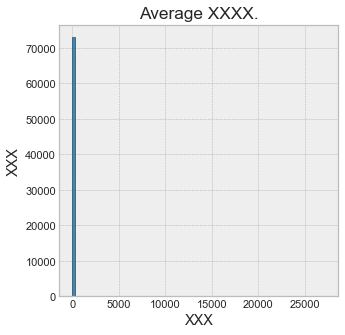

In [16]:
figsize(5, 5)

tmp_data = reports['xxx'].dropna().transpose() # preview purposes

plt.style.use('bmh')
plt.hist(tmp_data, bins = 100, edgecolor = 'k')
plt.xlabel('XXX')
plt.ylabel('XXX') 
plt.title('Average XXXX.')

We can see that the distribution is extremely skewed as the xxx contains a few high values, so called outliers.

We continue to review our data as we're processing and making adjustments

In [ ]:
reports.describe()

"output was removed"

In [116]:
reports['xxx'].describe()

count    72993.000000
mean        23.863046
std        132.751854
min          0.050000
25%         18.800000
50%         22.000000
75%         25.730000
max      27272.727273
Name: avg_me, dtype: float64

In [117]:
reports["xxx"].dropna().sort_values().tail(10)

71876     4383.652174
70760     4408.000000
70714     4411.000000
70802     4786.434783
70934     4796.000000
71506     5058.360656
70980     5106.000000
57514    11180.000000
71548    14162.769231
78935    27272.727273
Name: avg_me, dtype: float64

In the following cells, we're just picking and inspecting few values to find out what's going on. 

In [ ]:
reports.loc[reports["xxxx"].values == 27272.727273, :]

"output was removed"

In [ ]:
reports.loc[reports["xxxx"].values == 14162.769231, :]

"output was removed"

In [ ]:
reports.loc[reports["xxxx"].values == 11180.000000, :]

"output was removed"

The most bottom values in the xxx columns contain either NaN -value or some super high value which to my understanding doesn't really makes sense. So this is something that should be handled as the xxx is the most important (target value) we're using for prediction later. 

Clean up the outliers in the xxx -column by following the goldon 3 X STD rule commonly used.

In [17]:
def remove_outliers(df: pd.DataFrame, col_name: str):
    # Calculate first and third quartile
    first_quartile = df[col_name].describe()['25%']
    third_quartile = df[col_name].describe()['75%']
    # Interquartile range
    iqr = third_quartile - first_quartile

    return df[(df[col_name] > (first_quartile - 3 * iqr)) &
                (df[col_name] < (third_quartile + 3 * iqr))]

In [18]:
def plot_pre_post_remove_outliers(df: pd.DataFrame, col_name: str):
    if col_name is None:
        return
    elif df.dtypes[col_name] == "object":
        return

    fig, axs = plt.subplots(2)
    fig.suptitle(col_name + ": PRE/POST")
    
    # PRE
    axs[0].hist(df[col_name].dropna(), bins = 20, edgecolor = 'black') #.dropna()
    
    tmp_data = remove_outliers(df, col_name)
    
    # POST
    axs[1].hist(tmp_data[col_name].dropna(), bins = 20, edgecolor = 'black') # .dropna()


##### NOTE
A lot of special cases of data distribution, don't have time to clean them all.

In [19]:
reports = remove_outliers(reports, "xxx")

Text(0.5, 1.0, 'Average xxx distribution')

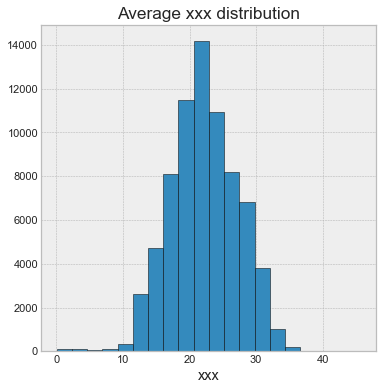

In [20]:
figsize(6, 6)
plt.hist(reports['xxx'], bins = 20, edgecolor = 'black')
plt.xlabel('xxx')
plt.title('Average xxx distribution')

Above pictures shows how the data looks like before and after cleaning. We now have a perfectly balanced values with a normal distribution.

Clean up the outliers in the perf_speed by following the 3 X STD rule commonly used.

In [21]:
reports = remove_outliers(reports, "xxx")

Text(0.5, 1.0, 'Average xxx distribution')

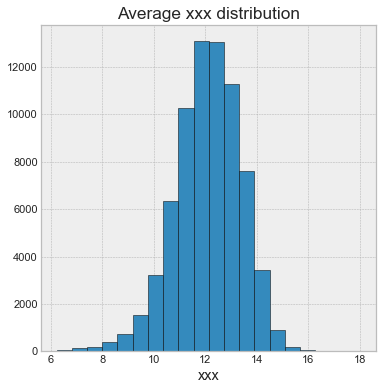

In [23]:
figsize(6, 6)
plt.hist(reports['xxx'], bins = 20, edgecolor = 'black')
plt.xlabel('xxx')
plt.title('Average xxx distribution')

In [ ]:
correlations_data = reports.corr()['xxx'].sort_values()
print(correlations_data.head(15)) # 'Bad'
print(correlations_data.tail(15)) # 'Good'

"output was removed"

In [ ]:
reports.info()

"output was removed"

From our correlations_data we can see a few scores around +- 0 which indicates very low
correlation between the given column and the xxx colum.

Due to time at this point, I'll drop a few columns below due to one of the reasons:
- 1. An object containing a lot of info (takes a lot of time to clean and prep)
- 2. Low correlations with xxx
- 3. Not fully investigated or cleaned (See plots above)

In [24]:
reports = reports.drop([
    "xxx1",
    "xxx2",
    "xxx3",
    "xxx4",
    "xxx5",
    "xxx6"
], axis=1)

In [ ]:
reports.info()

"output was removed"

### Split into Train/Test

In [25]:
# Separate  training / test data
features = reports.drop(columns='xxx') # drop out predictor variable
targets = pd.DataFrame(reports['xxx']) # as its the target

# Replace the inf and -inf with nan (just making sure)
features = features.replace({np.inf: np.nan, -np.inf: np.nan})

# Split into 70% training and 30% testing set (standard)
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 37)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50779, 7)
(21763, 7)
(50779, 1)
(21763, 1)


### Model evaluation metric often used with regression models

In [27]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

In [ ]:
baseline_guess = np.median(y_train)

print("The baseline guess of xxx: ", baseline_guess)
print("Baseline MAE on test set: ", mae(y_test, baseline_guess))

"output was removed"

In [ ]:
X_train.head(10)

"output was removed"

Text(0.5, 1.0, 'Average xxx')

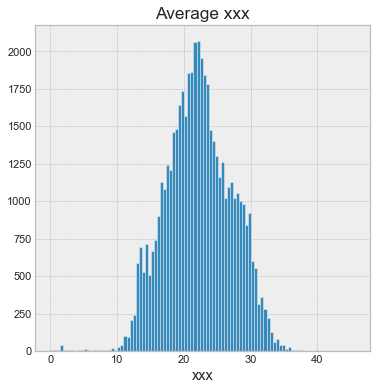

In [26]:
figsize(6, 6)

plt.style.use('bmh')
plt.hist(y_train['xxx'].dropna(), bins = 100)
plt.xlabel('xxx')
plt.title('Average xxx')

In [29]:
# Make sure all values are finite
print(np.where(~np.isfinite(X_train)))
print(np.where(~np.isfinite(X_test)))

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


In [30]:
scaler = MinMaxScaler(feature_range=(0, 1)) # Normalizer object

In [31]:
# Fit on the training data
scaler.fit(X_train)

# Normalize both the training and testing data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
# Convert y to one-dimensional array (vector)
y_train = np.array(y_train).reshape((-1, ))
y_test = np.array(y_test).reshape((-1, ))

In [33]:
_tmp = pd.DataFrame(X_train)
_tmp.head()

,0,1,2,3,4,5,6
0,0.409129,0.063205,0.283932,0.942857,0.433560,0.338346,0.462466
1,0.447168,0.101580,0.496085,0.742857,0.535229,0.674436,0.613941
2,0.424345,0.126411,0.518870,0.714286,0.536671,0.714286,0.613941
3,0.551141,0.040632,0.589954,0.914286,0.639576,0.759398,0.613941
4,0.670330,0.063205,0.593250,0.942857,0.639473,0.777143,0.612601


In [34]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)
    
    # Return the performance metric
    return model_mae

Below, we briefly test out various models to see which one immediatly suits the problem better. Recall this is a regression problem.

In [143]:
lr = LinearRegression()
lr_mae = fit_and_evaluate(lr)

print('Linear Regression: MAE = %0.4f' % lr_mae)

Linear Regression: MAE = 2.8409


In [144]:
random_forest = RandomForestRegressor(random_state=6)
random_forest_mae = fit_and_evaluate(random_forest)

print('Random Forest: MAE = %0.4f' % random_forest_mae)

Random Forest: MAE = 1.7547


In [145]:
svm = SVR(C = 1000, gamma = 0.1)
svm_mae = fit_and_evaluate(svm)

print('Support Vector Machine: MAE = %0.4f' % svm_mae)

Support Vector Machine: MAE = 2.7053


In [146]:
gradient_boosted = GradientBoostingRegressor(random_state=60)
gradient_boosted_mae = fit_and_evaluate(gradient_boosted)

print('Gradient Boosted: MAE = %0.4f' % gradient_boosted_mae)

Gradient Boosted: MAE = 2.4731


In [147]:
knn = KNeighborsRegressor(n_neighbors=10)
knn_mae = fit_and_evaluate(knn)

print('K-Nearest Neighbors: MAE = %0.4f' % knn_mae)


K-Nearest Neighbors: MAE = 2.1701


In [148]:
lasso = Lasso()
lassso_mae = fit_and_evaluate(lasso)

print('Lasso Regression: MAE = %0.4f' % lassso_mae)

Lasso Regression: MAE = 3.9440


In [149]:
ridge = Ridge()
ridge_mae = fit_and_evaluate(ridge)

print('Ridge Regression: MAE = %0.4f' % ridge_mae)

Ridge Regression: MAE = 2.8416


In [150]:
ela_net = ElasticNet()
ela_net_mae = fit_and_evaluate(ela_net)

print('ElasticNet: MAE = %0.4f' % ela_net_mae)

ElasticNet: MAE = 3.9440


Let's continue with the RandomForestRegressor and give it some light tuning.

In [52]:
forest_model = RandomForestRegressor(random_state=6)

In [53]:
for k,v in forest_model.get_params().items():
    print(f">> {k} : {v}")

>> bootstrap : True
>> ccp_alpha : 0.0
>> criterion : squared_error
>> max_depth : None
>> max_features : auto
>> max_leaf_nodes : None
>> max_samples : None
>> min_impurity_decrease : 0.0
>> min_samples_leaf : 1
>> min_samples_split : 2
>> min_weight_fraction_leaf : 0.0
>> n_estimators : 100
>> n_jobs : None
>> oob_score : False
>> random_state : 6
>> verbose : 0
>> warm_start : False


### Finding model params - RandomizedSearchCV
Define a grid of hyperparameter ranges, and randomly sample from the grid, performing K-Fold CV with each combination of values

In [54]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_123 = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

In [55]:
random_grid = {
    'bootstrap': [True, False],
    'max_depth': [10, 15, None],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf': [4, 6, 10],
    'min_samples_split': [2, 4, 8],
    'n_estimators': [100, 1000, 2000]
}

2\*3\*3\*3\*3\*3 = 486 different settings !! (not testing them all though)  

In [56]:
# Random search with 4-fold cross validation # n_iter = 100, cv = 3, verbose=2, random_state=42
random_cv = RandomizedSearchCV(
    estimator=forest_model,
    param_distributions=random_123,
    cv=4,
    n_iter=5, 
    scoring = "neg_mean_absolute_error",
    n_jobs = -1,
    verbose = 1, 
    return_train_score = True,
    random_state=6
)

In [57]:
for k,v in random_cv.get_params().items():
    print(f">> {k} : {v}")

>> cv : 4
>> error_score : nan
>> estimator__bootstrap : True
>> estimator__ccp_alpha : 0.0
>> estimator__criterion : squared_error
>> estimator__max_depth : None
>> estimator__max_features : auto
>> estimator__max_leaf_nodes : None
>> estimator__max_samples : None
>> estimator__min_impurity_decrease : 0.0
>> estimator__min_samples_leaf : 1
>> estimator__min_samples_split : 2
>> estimator__min_weight_fraction_leaf : 0.0
>> estimator__n_estimators : 100
>> estimator__n_jobs : None
>> estimator__oob_score : False
>> estimator__random_state : 6
>> estimator__verbose : 0
>> estimator__warm_start : False
>> estimator : RandomForestRegressor(random_state=6)
>> n_iter : 5
>> n_jobs : -1
>> param_distributions : {'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
>> pre_dispatch : 

In [58]:
random_cv.fit(X_train, y_train)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(random_state=6),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=6, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=1)

In [59]:
# Get all of the CV results and sort by performance
random_results = pd.DataFrame(random_cv.cv_results_).sort_values('mean_test_score', ascending = False)
random_results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
4,64.817620,0.377702,6.957006,0.108599,1800,2,2,sqrt,50,True,"{'n_estimators': 1800, 'min_samples_split': 2,...",-1.789847,-1.804443,-1.756506,-1.748016,-1.774703,0.023223,1,-1.214241,-1.210424,-1.226648,-1.220349,-1.217915,0.006160
2,94.147914,0.927279,2.869153,0.083787,1000,10,1,auto,None,True,"{'n_estimators': 1000, 'min_samples_split': 10...",-1.807827,-1.824559,-1.777088,-1.771557,-1.795258,0.021843,2,-1.218235,-1.216766,-1.234356,-1.230390,-1.224937,0.007585
1,145.046011,2.126034,9.134130,2.409357,1600,5,2,auto,20,True,"{'n_estimators': 1600, 'min_samples_split': 5,...",-1.821449,-1.839026,-1.792696,-1.794275,-1.811862,0.019406,3,-1.211475,-1.210800,-1.231333,-1.239738,-1.223337,0.012558
3,41.389540,0.424916,2.890998,0.070996,1200,2,4,sqrt,20,True,"{'n_estimators': 1200, 'min_samples_split': 2,...",-1.893567,-1.897853,-1.852837,-1.855290,-1.874887,0.020896,4,-1.588278,-1.580626,-1.602690,-1.602449,-1.593511,0.009454
0,52.597009,0.617205,1.292638,0.101615,400,2,4,auto,40,False,"{'n_estimators': 400, 'min_samples_split': 2, ...",-2.068780,-2.044510,-1.999353,-1.998086,-2.027682,0.030210,5,-1.332302,-1.327413,-1.341940,-1.318088,-1.329936,0.008609


In [60]:
random_cv.best_estimator_

RandomForestRegressor(max_depth=50, max_features='sqrt', min_samples_leaf=2,
                      n_estimators=1800, random_state=6)

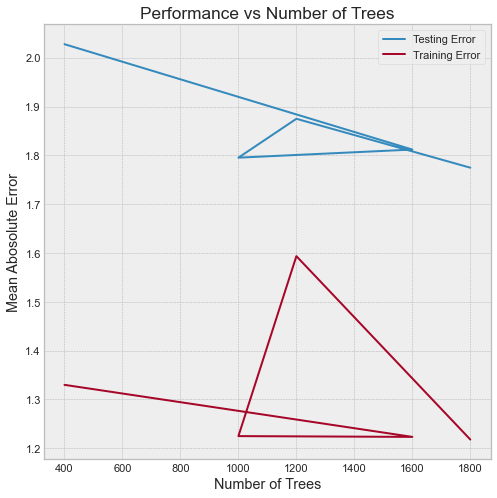

In [61]:

# Get the results into a dataframe
results = pd.DataFrame(random_cv.cv_results_)

# Plot the training and testing error vs number of trees, whats the bets choise (?)
figsize(8, 8)
plt.style.use('bmh')
plt.plot(results['param_n_estimators'], -1 * results['mean_test_score'], label = 'Testing Error')
plt.plot(results['param_n_estimators'], -1 * results['mean_train_score'], label = 'Training Error')
plt.xlabel('Number of Trees'); plt.ylabel('Mean Abosolute Error'); plt.legend();
plt.title('Performance vs Number of Trees');

## Training

In [65]:
forest_model = RandomForestRegressor(random_state=6)
final_model = random_cv.best_estimator_

In [66]:
%%timeit -n 1 -r 4
forest_model.fit(X_test, y_test)

4.01 s ± 17.5 ms per loop (mean ± std. dev. of 4 runs, 1 loop each)


In [67]:
%%timeit -n 1 -r 4
final_model.fit(X_test, y_test)

24.4 s ± 60.7 ms per loop (mean ± std. dev. of 4 runs, 1 loop each)


## Eval

In [68]:
default_pred = forest_model.predict(X_test)
final_pred = final_model.predict(X_test)

print("Default model : ", mae(y_test, default_pred))
print("Final model   : ", mae(y_test, final_pred))

Default model :  0.7613404385410366
Final model   :  1.2546627915132753


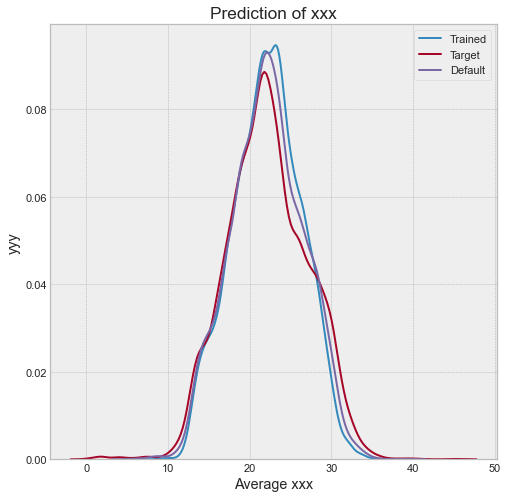

In [71]:
figsize(8, 8)

sns.kdeplot(final_pred, label = 'Trained')
sns.kdeplot(y_test, label = 'Target')
sns.kdeplot(default_pred, label = 'Default')

plt.xlabel('Average xxx');
plt.ylabel('yyy');
plt.title('Prediction of xxx');
plt.legend()

**To summarize**:

We now finally have a model that can somewhat predict the estimated values of xxx. As we can wee, the default params for the RandomForestRegressor is actually better then what we found experimentally. Improving the prediction % was not the goal of this project. Also, additional time was not used to fine tune the model, nor to find the best params.